<a href="https://colab.research.google.com/github/NewMKE/CodingExercise/blob/master/programming_challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the two images
!wget 'https://github.com/Henry-Medeiros/images/raw/master/8band_013022223130_Public_img69_noisy.tif' 
!wget 'https://github.com/Henry-Medeiros/images/raw/master/8band_013022223130_Public_img68_noisy.tif' 

--2020-09-21 22:28:01--  https://github.com/Henry-Medeiros/images/raw/master/8band_013022223130_Public_img69_noisy.tif
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/8band_013022223130_Public_img69_noisy.tif [following]
--2020-09-21 22:28:01--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/8band_013022223130_Public_img69_noisy.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196590 (192K) [image/tiff]
Saving to: ‘8band_013022223130_Public_img69_noisy.tif.3’

8band_013022223130_ 100%[===================>] 191.98K  --.-KB/s    in 0.02s   

2020-09-21 22

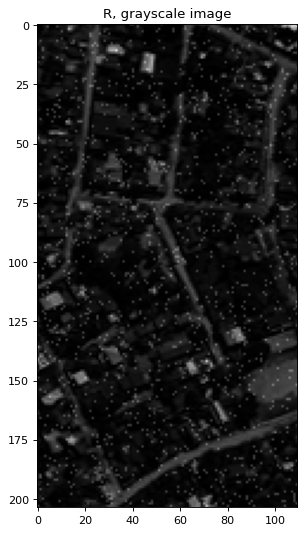

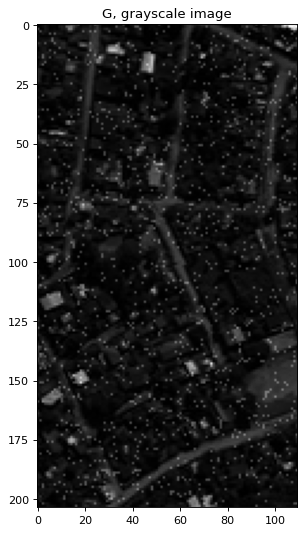

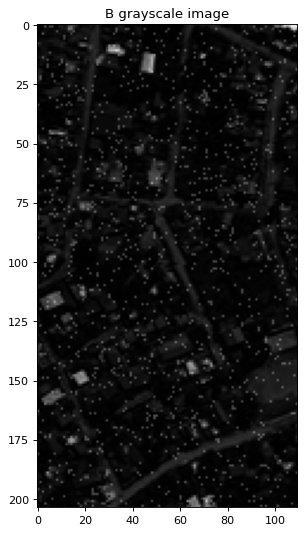

In [2]:
import numpy as np
from skimage import io
import cv2 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# read the images
img1 = io.imread('8band_013022223130_Public_img69_noisy.tif')
img2 = io.imread('8band_013022223130_Public_img68_noisy.tif')

# concatenate two images
img = np.concatenate((img1, img2))
# convert from 16 bit to 8bit
img = (img/np.max(img)*255.0).astype(int)

# get channel 4,2,1 as R,G,B
R = img[:,:,4]
G = img[:,:,2]
B = img[:,:,1]

# plot each channel
plt.show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('R, grayscale image')
plt.imshow(R,'gray')
plt.show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('G, grayscale image')
plt.imshow(G,'gray')
plt.show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('B grayscale image')
plt.imshow(B,'gray')



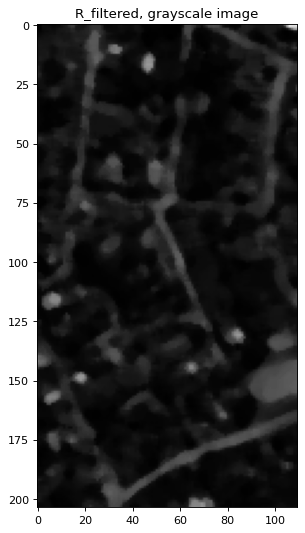

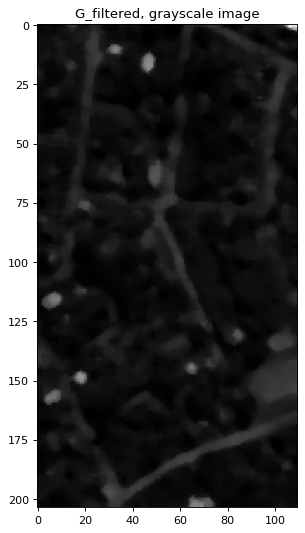

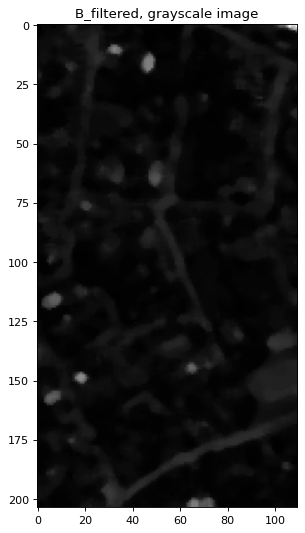

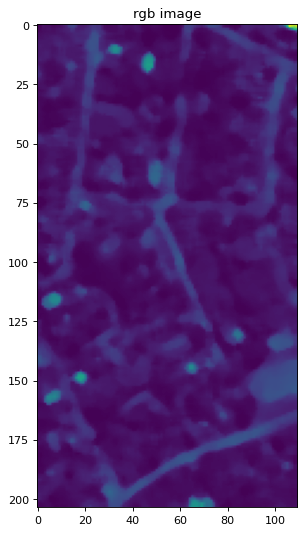

In [3]:
import cv2
import scipy.ndimage
from matplotlib.pyplot import figure

# do filtering for each channel
R_filtered = scipy.ndimage.filters.median_filter(R,size = 5)
plt.show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('R_filtered, grayscale image')
plt.imshow(R_filtered,'gray')

G_filtered = scipy.ndimage.filters.median_filter(G,size = 5)
plt.show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('G_filtered, grayscale image')
plt.imshow(G_filtered,'gray')

B_filtered = scipy.ndimage.filters.median_filter(B,size = 5)
plt.show()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('B_filtered, grayscale image')
plt.imshow(B_filtered,'gray')

# convert R,G,B to grayscale
img_gray = 0.299*R_filtered+0.587*G_filtered+0.114*B_filtered

# converting back from grayscale to one RGB image
# searched from online: https://stackoverflow.com/questions/835753/convert-grayscale-value-to-rgb-representation#:~:text=Conversion%20of%20a%20grayscale%20to,RGB)%20is%20an%20additive%20system.&text=Thus%20adding%20red%20to%20green%20yields%20yellow.
rgb = img_gray * 0x00010101;
# rgb = cv2.merge((R,G,B))
plt.show()
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

plt.title('rgb image')
plt.imshow(rgb)